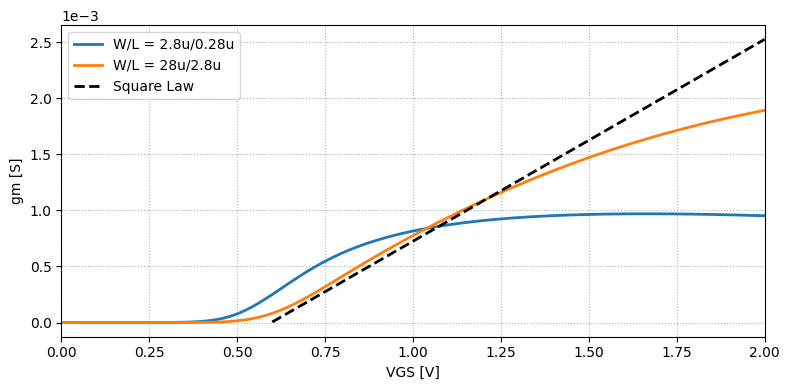

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib as mpl

# nch_25
# short = 2.8u/280n
# long  = 28u/2.8u
# vds = 2V

dir = "report_data"
filename = "short_long_channel_nch25_dcop.csv"
data = pd.read_csv(os.path.join(dir, filename))

# set theme and figure size
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)
# fig.set_dpi(100)

vgs      = data["M0:vgs X"].to_numpy()
gm_short = data["M0:gm Y"].to_numpy()
gm_long  = data["M1:gm Y"].to_numpy()
vt_long  = data["M1:vth Y"].to_numpy()[0]

for i in range(0, len(vgs)):
    if vgs[i] > vt_long:
        vt_idx = i
        break
    
def gm(vgs, vt):
    K = 0.0018
    return K * (vgs - vt)
    
gm_fit = np.polyfit(vgs[vt_idx:], gm_long[vt_idx:], deg=1)
ax.plot(vgs, gm_short, linewidth=2, label="W/L = 2.8u/0.28u")
ax.plot(vgs, gm_long, linewidth=2, label="W/L = 28u/2.8u")
#ax.plot(vgs[vt_idx:], np.polyval(gm_fit, vgs[vt_idx:]), linewidth=2, linestyle="--", color="black", label="Square Law")
ax.plot(vgs[vt_idx:], gm(vgs, vt_long)[vt_idx:], linewidth=2, linestyle="--", color="black", label="Square Law")

ax.legend(loc="upper left")
ax.grid(linestyle='dotted')
ax.set_xlabel('VGS [V]')
ax.set_ylabel('gm [S]')
plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0, 0)) 

plt.xlim(0, 2)
fig.tight_layout()

filename = "short_long_channel_gm.pdf"
path = os.path.join("../report/imgs", filename)
overwrite = False
if not os.path.isfile(path) or overwrite:
    print("Saving to", path)
    plt.savefig(path)

Saving to ../report/imgs\short_long_channel_id.pdf


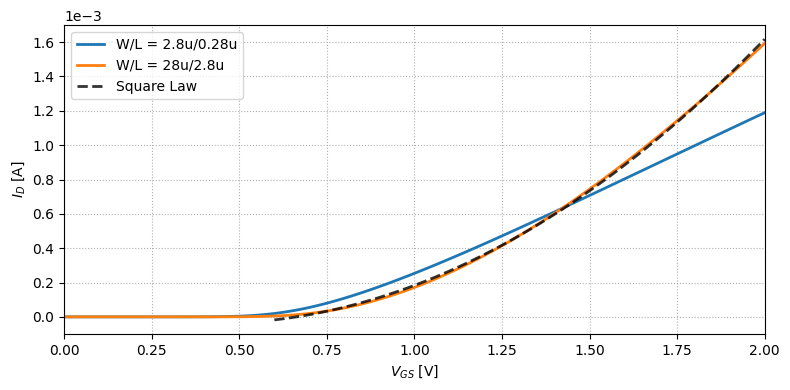

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib as mpl

dir = "report_data"
filename = "short_long_channel_nch25_dcop.csv"
data = pd.read_csv(os.path.join(dir, filename))

# set theme and figure size
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)
# fig.set_dpi(100)

vgs      = data["M0:vgs X"].to_numpy()
id_short = data["M0:id Y"].to_numpy()
id_long  = data["M1:id Y"].to_numpy()
vt_long  = data["M1:vth Y"].to_numpy()[0]
vt_short = data["M0:vth Y"].to_numpy()[0]

for i in range(0, len(vgs)):
    if vgs[i] > vt_long:
        vt_idx = i
        break
for i in range(0, len(vgs)):
    if vgs[i] > vt_short:
        vt_idx_short = i
        break
    
id_fit = np.polyfit(vgs[vt_idx:], id_long[vt_idx:], deg=2)
id_fit2 = np.polyfit(vgs[vt_idx_short:], id_short[vt_idx_short:], deg=2)
ax.plot(vgs, id_short, linewidth=2, label="W/L = 2.8u/0.28u")
ax.plot(vgs, id_long, linewidth=2, label="W/L = 28u/2.8u")
ax.plot(vgs[vt_idx:], np.polyval(id_fit, vgs[vt_idx:]), linewidth=2, linestyle="--", color="black", alpha=0.8, label="Square Law")

ax.legend(loc="upper left")
ax.grid(linestyle='dotted')
ax.set_xlabel('$V_{GS}$ [V]')
ax.set_ylabel('$I_D$ [A]')
plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0, 0)) 

plt.xlim(0, 2)
fig.tight_layout()

filename = "short_long_channel_id.pdf"
path = os.path.join("../report/imgs", filename)
overwrite = False
if not os.path.isfile(path) or overwrite:
    print("Saving to", path)
    plt.savefig(path)

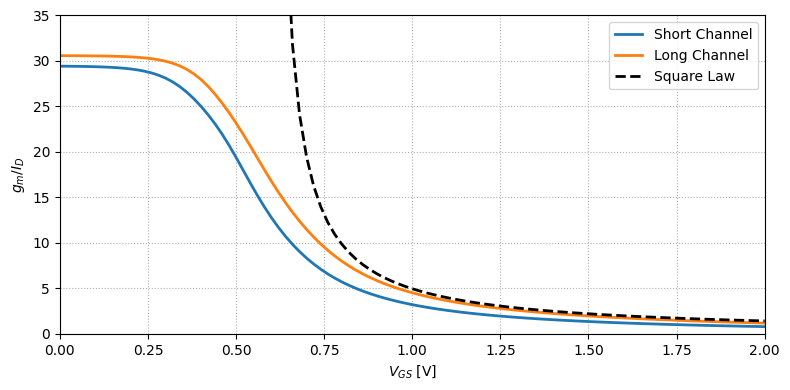

In [65]:
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib as mpl

# nch_25
# short = 2.8u/280n
# long  = 28u/2.8u
# vds = 2V

dir = "report_data"
filename = "short_long_channel_nch25_dcop.csv"
data = pd.read_csv(os.path.join(dir, filename))

# set theme and figure size
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)
# fig.set_dpi(100)

vgs      = data["M0:vgs X"].to_numpy()
gmid_short = data["M0:gmoverid Y"].to_numpy()
gmid_long  = data["M1:gmoverid Y"].to_numpy()
vt_long  = data["M1:vth Y"].to_numpy()[0]

for i in range(0, len(vgs)):
    if vgs[i] > vt_long:
        vt_idx = i
        break

gmid_square = 2 / (vgs - vt_long)
    
gmid_fit = np.polyfit(vgs, gmid_long, deg=2)
ax.plot(vgs, gmid_short, linewidth=2, label="W/L = 2.8u/0.28u")
ax.plot(vgs, gmid_long, linewidth=2, label="W/L = 28u/2.8u")
ax.plot(vgs[vt_idx:], gmid_square[vt_idx:], linewidth=2, linestyle="--", color="black", label="Square Law")

ax.legend(loc="upper right")
ax.grid(linestyle='dotted')
ax.set_xlabel('$V_{GS}$ [V]')
ax.set_ylabel('$g_m/I_D$')

plt.ylim(0, 35)
plt.xlim(0, 2)
fig.tight_layout()

filename = "short_long_channel_gm.pdf"
path = os.path.join("../report/imgs", filename)
overwrite = False
if not os.path.isfile(path) or overwrite:
    print("Saving to", path)
    plt.savefig(path)

0.5971338449412689


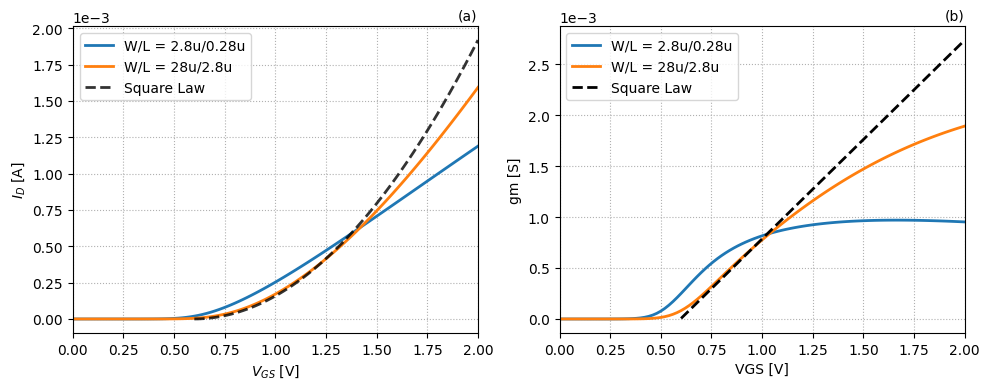

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib as mpl

# nch_25
# short = 2.8u/280n
# long  = 28u/2.8u
# vds = 2V

dir = "report_data"
filename = "short_long_channel_nch25_dcop.csv"
data = pd.read_csv(os.path.join(dir, filename))

# set theme and figure size
fig, (ax2, ax1) = plt.subplots(1, 2)
fig.set_size_inches(10, 4)

vgs      = data["M0:vgs X"].to_numpy()
gm_short = data["M0:gm Y"].to_numpy()
gm_long  = data["M1:gm Y"].to_numpy()
vt_long  = data["M1:vth Y"].to_numpy()[0]
id_short = data["M0:id Y"].to_numpy()
id_long  = data["M1:id Y"].to_numpy()

for i in range(0, len(vgs)):
    if vgs[i] > vt_long:
        vt_idx = i
        break
print(vt_long)

K = 0.00195
def id(vgs, vt):
    return (1/2)*K*(vgs - vt)**2
    
def gm(vgs, vt):
    return K * (vgs - vt)

ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0)) 
ax1.plot(vgs, gm_short, linewidth=2, label="W/L = 2.8u/0.28u")
ax1.plot(vgs, gm_long, linewidth=2, label="W/L = 28u/2.8u")
ax1.plot(vgs[vt_idx:], gm(vgs, vt_long)[vt_idx:], linewidth=2, linestyle="--", color="black", label="Square Law")

ax1.legend(loc="upper left")
ax1.grid(linestyle='dotted')
ax1.set_xlabel('VGS [V]')
ax1.set_ylabel('gm [S]')
ax1.set_xlim(0, 2)
ax1.annotate("(b)", xycoords='axes fraction', xy=(0.95, 1.02))

ax2.ticklabel_format(axis='y', style='sci', scilimits=(0, 0)) 
ax2.plot(vgs, id_short, linewidth=2, label="W/L = 2.8u/0.28u")
ax2.plot(vgs, id_long, linewidth=2, label="W/L = 28u/2.8u")
ax2.plot(vgs[vt_idx:], id(vgs, vt_long)[vt_idx:], linewidth=2, linestyle="--", color="black", alpha=0.8, label="Square Law")

ax2.legend(loc="upper left")
ax2.grid(linestyle='dotted')
ax2.set_xlabel('$V_{GS}$ [V]')
ax2.set_ylabel('$I_D$ [A]')
ax2.set_xlim(0, 2)
ax2.annotate("(a)", xycoords='axes fraction', xy=(0.95, 1.02))

fig.tight_layout()

filename = "short_long_channel_gm_and_id.pdf"
path = os.path.join("../report/imgs", filename)
overwrite = False
if not os.path.isfile(path) or overwrite:
    print("Saving to", path)
    plt.savefig(path)

Saving to ../report/imgs\short_long_channel_id_log.pdf


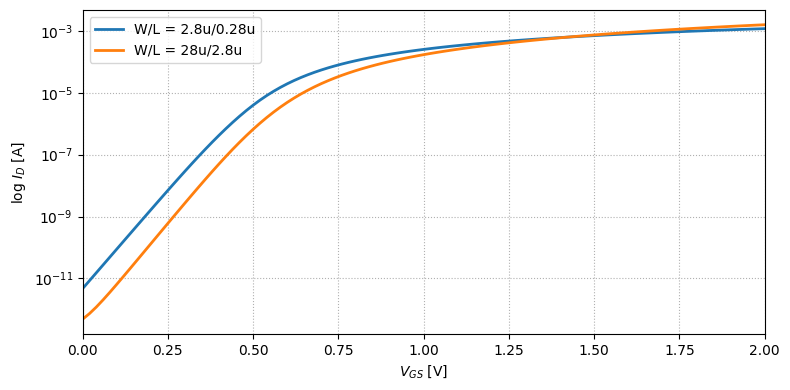

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib as mpl

dir = "report_data"
filename = "short_long_channel_nch25_dcop.csv"
data = pd.read_csv(os.path.join(dir, filename))

# set theme and figure size
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)
# fig.set_dpi(100)

vgs      = data["M0:vgs X"].to_numpy()
id_short = data["M0:id Y"].to_numpy()
id_long  = data["M1:id Y"].to_numpy()
vt_long  = data["M1:vth Y"].to_numpy()[0]
vt_short = data["M0:vth Y"].to_numpy()[0]

for i in range(0, len(vgs)):
    if vgs[i] > vt_long:
        vt_idx = i
        break
for i in range(0, len(vgs)):
    if vgs[i] > vt_short:
        vt_idx_short = i
        break
    
id_fit = np.polyfit(vgs[vt_idx:], id_long[vt_idx:], deg=2)
id_fit2 = np.polyfit(vgs[vt_idx_short:], id_short[vt_idx_short:], deg=2)
ax.plot(vgs, id_short, linewidth=2, label="W/L = 2.8u/0.28u")
ax.plot(vgs, id_long, linewidth=2, label="W/L = 28u/2.8u")
#ax.plot(vgs[vt_idx:], np.polyval(id_fit, vgs[vt_idx:]), linewidth=2, linestyle="--", color="black", alpha=0.8, label="Square Law")

ax.set_yscale('log')
ax.legend(loc="upper left")
ax.grid(linestyle='dotted')
ax.set_xlabel('$V_{GS}$ [V]')
ax.set_ylabel('log $I_D$ [A]')

plt.xlim(0, 2)
fig.tight_layout()

filename = "short_long_channel_id_log.pdf"
path = os.path.join("../report/imgs", filename)
overwrite = False
if not os.path.isfile(path) or overwrite:
    print("Saving to", path)
    plt.savefig(path)

Saving to ../report/imgs\short_long_channel_va.pdf


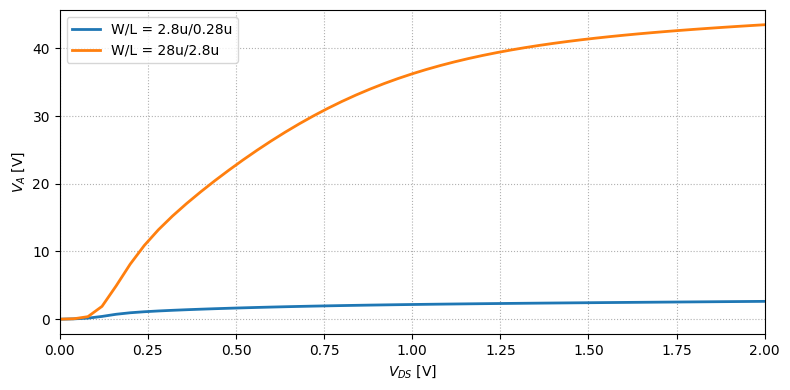

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib as mpl

dir = "report_data"
filename = "short_long_channel_vds_sweep.csv"
data = pd.read_csv(os.path.join(dir, filename))

# set theme and figure size
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)
# fig.set_dpi(100)

vgs      = data["M0:vds Y"].to_numpy()
id_short = data["M0:vearly Y"].to_numpy()
id_long  = data["M1:vearly Y"].to_numpy()
vt_long  = data["M1:vth Y"].to_numpy()[0]
vt_short = data["M0:vth Y"].to_numpy()[0]
    
ax.plot(vgs, id_short, linewidth=2, label="W/L = 2.8u/0.28u")
ax.plot(vgs, id_long, linewidth=2, label="W/L = 28u/2.8u")
#ax.plot(vgs[vt_idx:], np.polyval(id_fit, vgs[vt_idx:]), linewidth=2, linestyle="--", color="black", alpha=0.8, label="Square Law")

ax.legend(loc="upper left")
ax.grid(linestyle='dotted')
ax.set_xlabel('$V_{DS}$ [V]')
ax.set_ylabel('$V_A$ [V]')

plt.xlim(0, 2)
fig.tight_layout()

filename = "short_long_channel_va.pdf"
path = os.path.join("../report/imgs", filename)
overwrite = False
if not os.path.isfile(path) or overwrite:
    print("Saving to", path)
    plt.savefig(path)

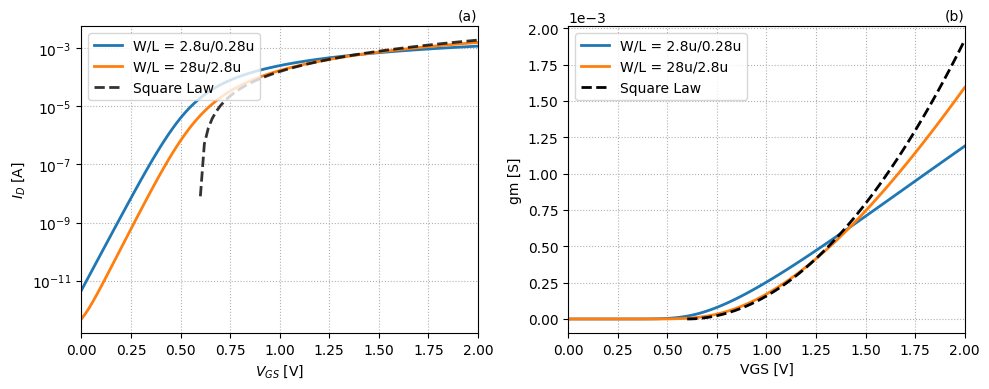

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib as mpl

# nch_25
# short = 2.8u/280n
# long  = 28u/2.8u
# vds = 2V

dir = "report_data"
filename = "short_long_channel_nch25_dcop.csv"
data = pd.read_csv(os.path.join(dir, filename))

# set theme and figure size
fig, (ax2, ax1) = plt.subplots(1, 2)
fig.set_size_inches(10, 4)

vgs      = data["M0:vgs X"].to_numpy()
id_short = data["M0:id Y"].to_numpy()
id_long  = data["M1:id Y"].to_numpy()
vt_long  = data["M1:vth Y"].to_numpy()[0]

for i in range(0, len(vgs)):
    if vgs[i] > vt_long:
        vt_idx = i
        break

K = 0.00195
def id(vgs, vt):
    return (1/2)*K*(vgs - vt)**2
    
def gm(vgs, vt):
    return K * (vgs - vt)

ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0)) 
ax1.plot(vgs, id_short, linewidth=2, label="W/L = 2.8u/0.28u")
ax1.plot(vgs, id_long, linewidth=2, label="W/L = 28u/2.8u")
ax1.plot(vgs[vt_idx:], id(vgs, vt_long)[vt_idx:], linewidth=2, linestyle="--", color="black", label="Square Law")

ax1.legend(loc="upper left")
ax1.grid(linestyle='dotted')
ax1.set_xlabel('VGS [V]')
ax1.set_ylabel('gm [S]')
ax1.set_xlim(0, 2)
ax1.annotate("(b)", xycoords='axes fraction', xy=(0.95, 1.02))

offset = 5
ax2.ticklabel_format(axis='y', style='sci', scilimits=(0, 0)) 
ax2.plot(vgs, id_short, linewidth=2, label="W/L = 2.8u/0.28u")
ax2.plot(vgs, id_long, linewidth=2, label="W/L = 28u/2.8u")
ax2.plot(vgs[vt_idx:], id(vgs, vt_long)[vt_idx:], linewidth=2, linestyle="--", color="black", alpha=0.8, label="Square Law")

ax2.set_yscale('log')
ax2.legend(loc="upper left")
ax2.grid(linestyle='dotted')
ax2.set_xlabel('$V_{GS}$ [V]')
ax2.set_ylabel('$I_D$ [A]')
ax2.set_xlim(0, 2)
ax2.annotate("(a)", xycoords='axes fraction', xy=(0.95, 1.02))

fig.tight_layout()

filename = "short_long_channel_gm_and_id.pdf"
path = os.path.join("../report/imgs", filename)
overwrite = False
if not os.path.isfile(path) or overwrite:
    print("Saving to", path)
    plt.savefig(path)